In [1]:
# ipython extension to autoreload imported modules so that any changes will be up to date before running code in this nb
%load_ext autoreload 
%autoreload 2

In [2]:
from utils.jraph_data import get_lorenz_graph_tuples, print_graph_fts
from utils.lorenz import load_lorenz96_2coupled

import numpy as np
import jax.numpy as jnp

In [15]:
import ml_collections

config = ml_collections.ConfigDict()

# Data params. 
config.n_samples=5000
config.input_steps=1
config.output_delay=0 # predict 0 hours into the future
config.output_steps=4
config.timestep_duration= 3
config.sample_buffer=-1 * (config.input_steps + config.output_delay + config.output_steps - 1) # negative buffer so that our sample input are continuous (i.e. the first sample would overlap a bit with consecutive samples) 
config.time_resolution=120
config.init_buffer_samples=0
config.train_pct=0.7
config.val_pct=0.2
config.test_pct=0.1
config.K=36
config.F=8
config.c=10
config.b=10
config.h=1
config.seed=42
config.normalize=True
config.fully_connected_edges=False

# Optimizer.
config.optimizer = 'sgd'
config.learning_rate = 0.00045346796177033903
config.momentum = 0.8712873602503628

# Training hyperparameters.
# config.batch_size = 3
config.epochs = 150
config.log_every_epochs = 5
config.eval_every_epochs = 5
config.checkpoint_every_epochs = 10
config.max_checkpts_to_keep = None # None means keep all checkpoints

# GNN hyperparameters.
config.model = 'MLPGraphNetwork'
config.n_blocks = 1
config.activation = 'relu'
config.dropout_rate = 0.013287043114620523
config.skip_connections = False # This was throwing a broadcast error in add_graphs_tuples_nodes when this was set to True
config.layer_norm = False # TODO perhaps we want to turn on later
config.edge_features = (8, 8) # the last feature size will be the number of features that the graph predicts
config.node_features = (32, 2)
config.global_features = None
config.share_params = False

In [16]:
from utils.jraph_training import train_and_evaluate
from utils.jraph_vis import plot_predictions

In [17]:
# set up logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [19]:
workdir="tests/outputs/runtime_test2"

trained_state, train_metrics, eval_metrics_dict = train_and_evaluate(
    config=config, workdir=workdir)


INFO:absl:Obtaining datasets.
INFO:absl:Hyperparameters: {'F': 8, 'K': 36, 'activation': 'relu', 'b': 10, 'c': 10, 'checkpoint_every_epochs': 10, 'dropout_rate': 0.013287043114620523, 'edge_features': (8, 8), 'epochs': 150, 'eval_every_epochs': 5, 'fully_connected_edges': False, 'global_features': None, 'h': 1, 'init_buffer_samples': 0, 'input_steps': 1, 'layer_norm': False, 'learning_rate': 0.00045346796177033903, 'log_every_epochs': 5, 'max_checkpts_to_keep': None, 'model': 'MLPGraphNetwork', 'momentum': 0.8712873602503628, 'n_blocks': 1, 'n_samples': 5000, 'node_features': (32, 2), 'normalize': True, 'optimizer': 'sgd', 'output_delay': 0, 'output_steps': 4, 'sample_buffer': -4, 'seed': 42, 'share_params': False, 'skip_connections': False, 'test_pct': 0.1, 'time_resolution': 120, 'timestep_duration': 3, 'train_pct': 0.7, 'val_pct': 0.2}
INFO:absl:Initializing network.
INFO:absl:
+----------------------------------------+----------+------+----------+-------+
| Name                    

2 checkpoints logged runtime: 2m 27s
all checkpoints logged runtime: 2m 25s

no difference between logging every checkpoint/only logging the last 2. gpu issues probably stem from somewhere else

INFO:root:Generating datasets from config because none provided.


Checkpoint directory: tests/outputs/runtime_test2/checkpoints


INFO:root:Initializing network.
INFO:absl:
+----------------------------------------+----------+------+----------+-------+
| Name                                   | Shape    | Size | Mean     | Std   |
+----------------------------------------+----------+------+----------+-------+
| params/MLPBlock_0/MLP_0/Dense_0/bias   | (8,)     | 8    | 0.0      | 0.0   |
| params/MLPBlock_0/MLP_0/Dense_0/kernel | (6, 8)   | 48   | -0.103   | 0.37  |
| params/MLPBlock_0/MLP_0/Dense_1/bias   | (8,)     | 8    | 0.0      | 0.0   |
| params/MLPBlock_0/MLP_0/Dense_1/kernel | (8, 8)   | 64   | -0.0189  | 0.344 |
| params/MLPBlock_0/MLP_1/Dense_0/bias   | (32,)    | 32   | 0.0      | 0.0   |
| params/MLPBlock_0/MLP_1/Dense_0/kernel | (19, 32) | 608  | -0.00843 | 0.219 |
| params/MLPBlock_0/MLP_1/Dense_1/bias   | (2,)     | 2    | 0.0      | 0.0   |
| params/MLPBlock_0/MLP_1/Dense_1/kernel | (32, 2)  | 64   | -0.00627 | 0.195 |
+----------------------------------------+----------+------+----------+------

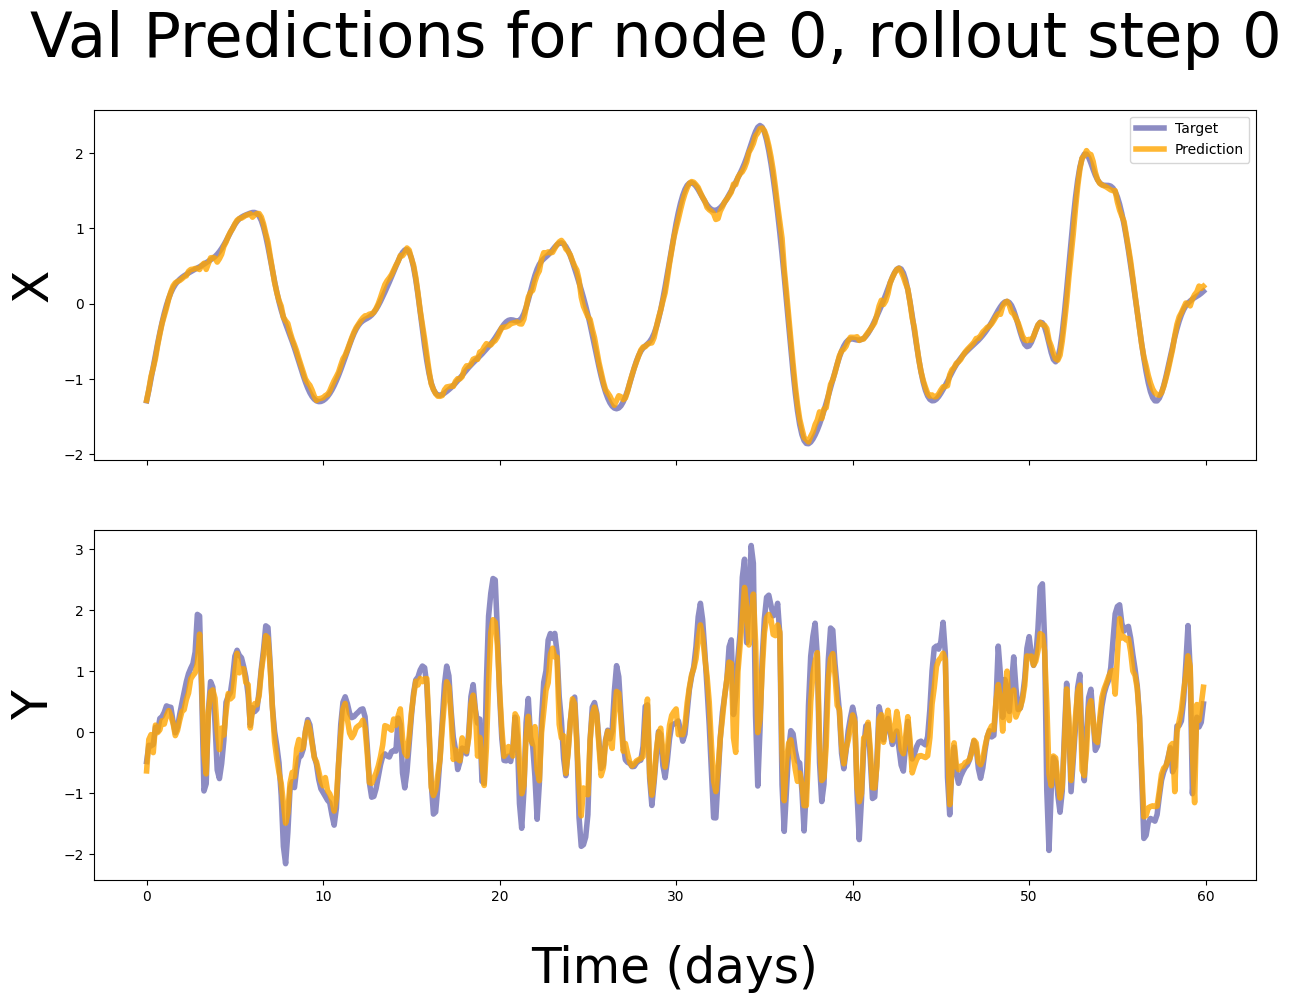

In [20]:
plot_predictions(
    config=config,
    workdir=workdir, # for loading checkpoints 
    plot_ith_rollout_step=0, # 0 indexed # for this study, we have a 4-step rollout 
    # dataset,
    # preds,
    # timestep_duration,
    # n_rollout_steps,
    #  total_steps,
    node=0, # 0-indexed 
    plot_mode="val", # i.e. "train"/"val"/"test"
    plot_days=60,
    title="Val Predictions for node 0, rollout step 0"
)